In [1]:
# Step 1 – Import Necessary Libraries and Modules
 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_excel(r"C:\Users\jki\Downloads\Online Retail Dataset\Online Retail.xlsx")
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [2]:
# lets get the statsistical summary
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# lets reove the negative values of quantity and UnitPrice
df = df[(df['Quantity']> 0) & (df['UnitPrice']>0)]

In [5]:
# lets on the negative values 
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [6]:
# let have  a look at missing values
missing_values =df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64


In [8]:
# lets drop the missing values
df.dropna(subset=['CustomerID'],inplace=True)

C:\Users\jki\AppData\Local\Temp\ipykernel_17084\4229336330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID'],inplace=True)


In [9]:
# let check if missing values have been removed
missing_values =  df.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [10]:
# let have have at a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
# let convert invoiceno , unitprice and customerid
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(int)

C:\Users\jki\AppData\Local\Temp\ipykernel_17084\4001140917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(int)
C:\Users\jki\AppData\Local\Temp\ipykernel_17084\4001140917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].astype(int)
C:\Users\jki\AppData\Local\Temp\ipykernel_17084\4001140917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [12]:
# rechck the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int32         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int32         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  int32         
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 22.8+ MB


In [13]:
# Lets do RFM Analysis
# Lets calculate the recency
# Lets DO the RFM analysis
# let alculate the recency 
snapshot_date = max(df['InvoiceDate']) + pd.DateOffset(days=1)

# let calculate the monetary values
df['Total'] = df['Quantity'] * df['UnitPrice']

# lets claculate the frequency

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total': 'sum'
})

# lets rename the column for readability

rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'MonetaryValue'},inplace=True)
rfm.head()

C:\Users\jki\AppData\Local\Temp\ipykernel_17084\4259015821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['UnitPrice']


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,74215
12347.0,2,7,3012
12348.0,75,4,944
12349.0,19,1,1404
12350.0,310,1,244


In [14]:
# Let calcualte RFM Score for Kmeans Algorith
# Lets calculate the RFM score for the purpose of K Means Algorithm to get the clusters

# now lets map the Recency ,Frequency and Moentary  Values columns to take on values of 1-5 one of {1,2,3,5}

#we will  assign the vlaues of five differenct bins and map each bin to a vlaue

# this how we define custome bin edges

# calculate cusom bin edges for Recency , Frequency and Monetary scores
recency_bins = [rfm['Recency'].min()-1,20,50,150,250,rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min() -1,2,3,10,100, rfm['Frequency'].max()]
monetary_bins = [rfm['MonetaryValue'].min() -3,300,600,2000,5000,rfm['MonetaryValue'].max()]

# now lets have the bin edges lets map the scores to corresponding labels between 1 and 5 (both inclusive)

# calculate Recency score based on custom bins
rfm['R_Score'] = pd.cut(rfm['Recency'],bins=recency_bins,labels=range(1,6),include_lowest=True)

# Reverse the recency scores so that higher values inidicate more recent purchase
rfm['R_Score'] = 5 - rfm['R_Score'].astype(int) + 1

# calcualte Frequency and Monetary scores based on custom bins

rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=range(1, 6), include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['MonetaryValue'], bins=monetary_bins, labels=range(1, 6), include_lowest=True).astype(int)

# lets look as the first few rows of the R_Score ,R_Score and M_score columns

# Print the first few rows of the RFM DataFrame to verify the scores
print(rfm[['R_Score', 'F_Score', 'M_Score']].head(50))


            R_Score  F_Score  M_Score
CustomerID                           
12346.0           1        1        5
12347.0           5        3        4
12348.0           3        3        3
12349.0           5        1        3
12350.0           1        1        1
12352.0           4        3        4
12353.0           2        1        1
12354.0           2        1        3
12355.0           2        1        2
12356.0           4        2        4
12357.0           4        1        4
12358.0           5        1        3
12359.0           3        3        5
12360.0           3        2        3
12361.0           1        1        1
12362.0           5        3        4
12363.0           3        1        2
12364.0           5        3        2
12365.0           1        1        2
12367.0           5        1        1
12370.0           3        3        4
12371.0           4        1        3
12372.0           3        2        3
12373.0           1        1        1
12374.0     

In [15]:
# K Means Clusetring
#  set 6 - perform K-Means Clustering
# Lets extrac R, and M scores  to perfomr K-Means clustering
# Extract RFM scores for K-Means clustering

X = rfm[['R_Score','F_Score','M_Score']]

C:\Users\jki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jki\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jki\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jki\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(execu

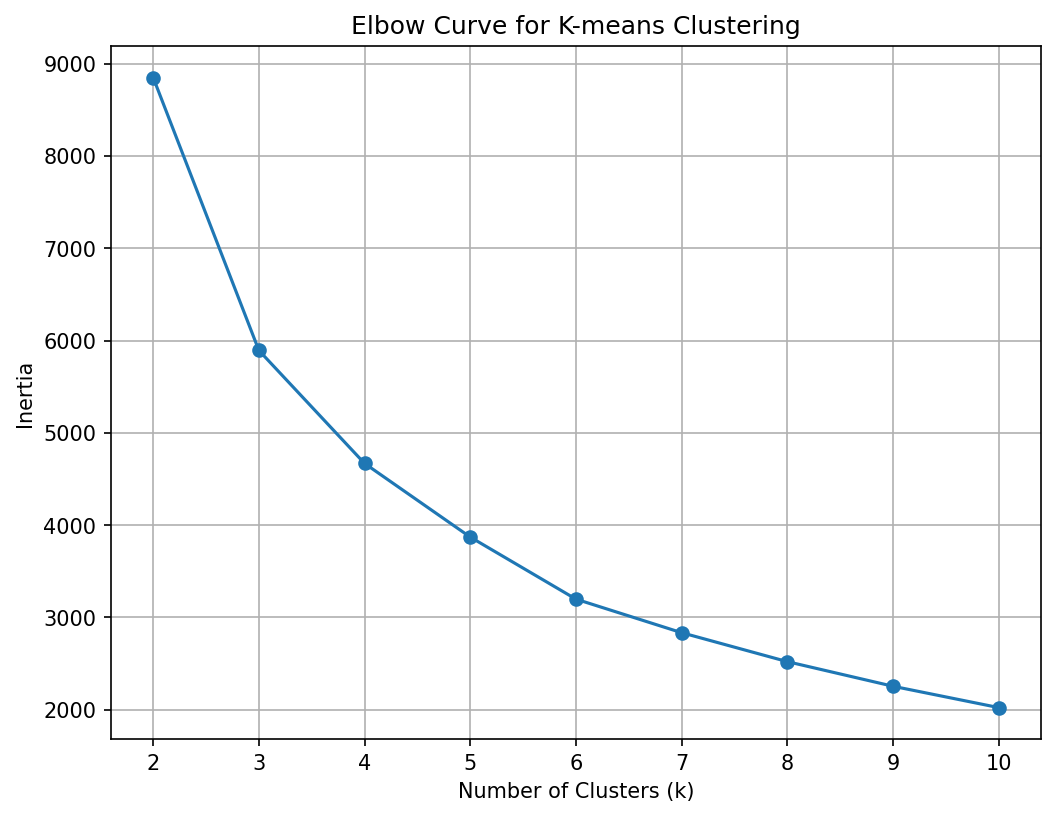

In [16]:
# next we need to find optimal number of clusters.for this lets run the Kmenss ,algorithm for range of K values and use the elbow method to pick the optimal K:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [17]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)


In [18]:
# Interpret the clusters to identify customer segments
# Now that we have the clusters ,let try to characterize them based on the RFM scores
# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [19]:
print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  4.673436  3.214460  3.442729
1        1  3.831763  1.146703  1.433378
2        2  2.917261  2.201141  2.984308
3        3  1.473913  1.071739  1.280435


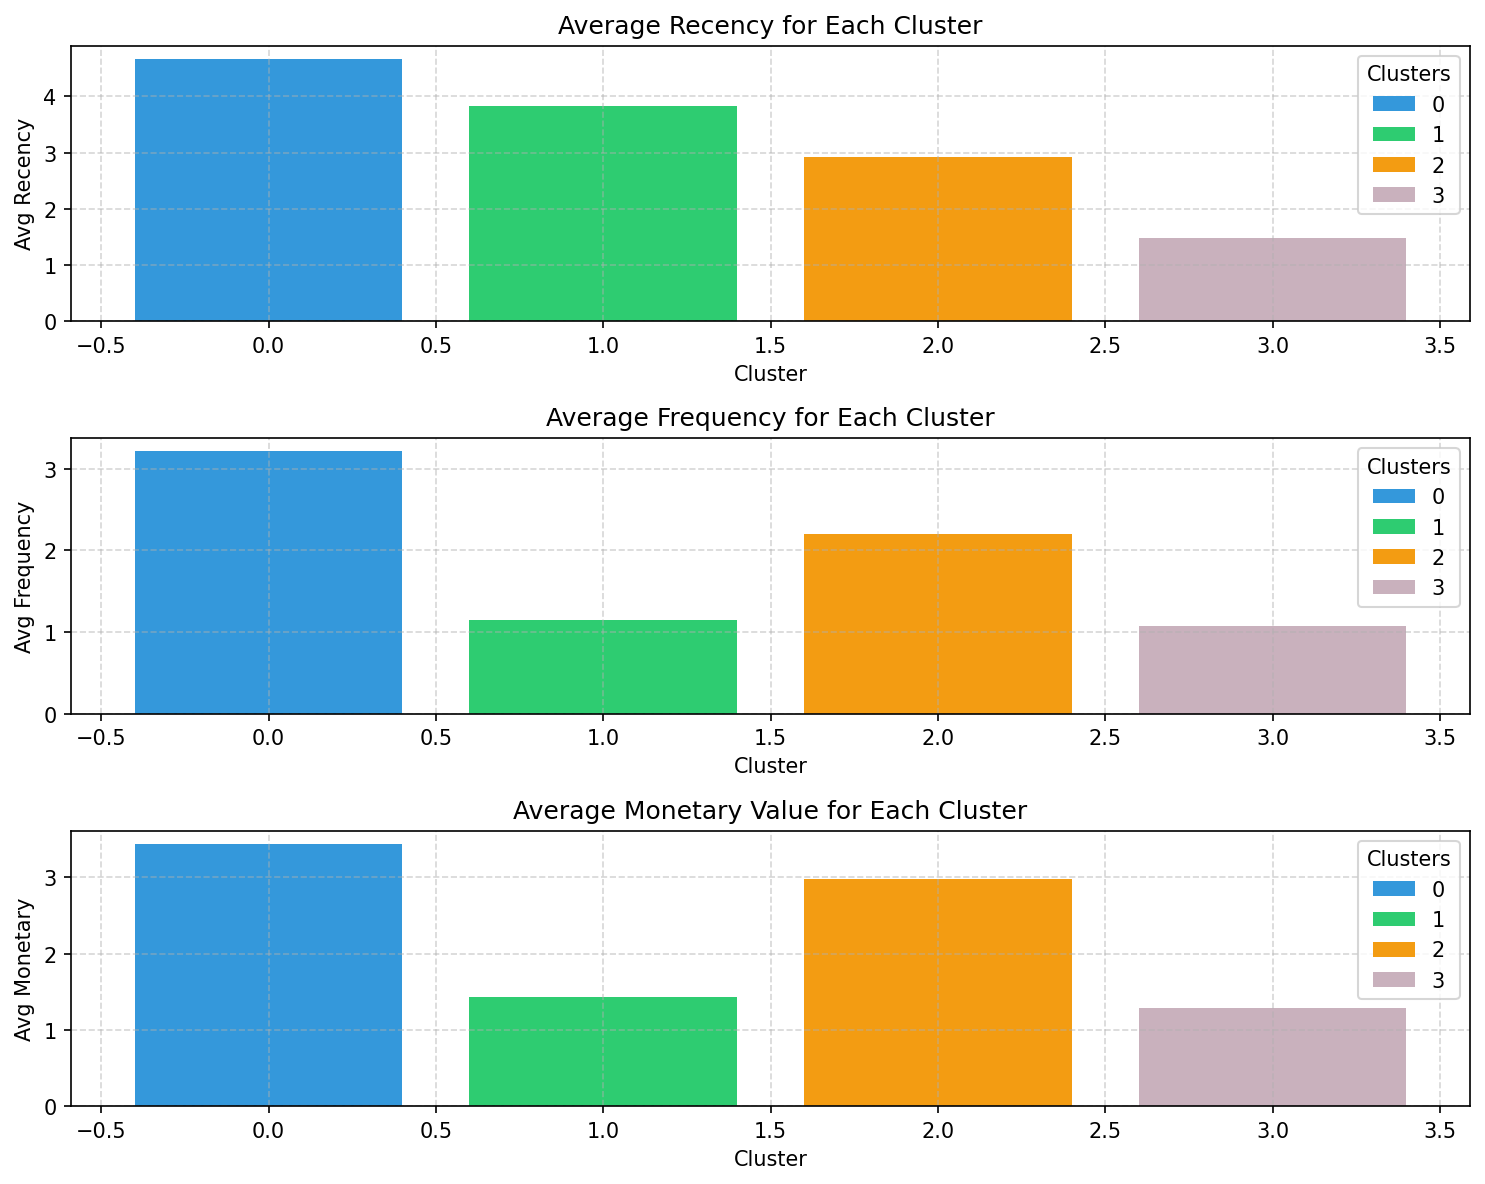

In [20]:
#  But let’s visualize the average R, F, and M scores for the clusters so it’s easy to interpret:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

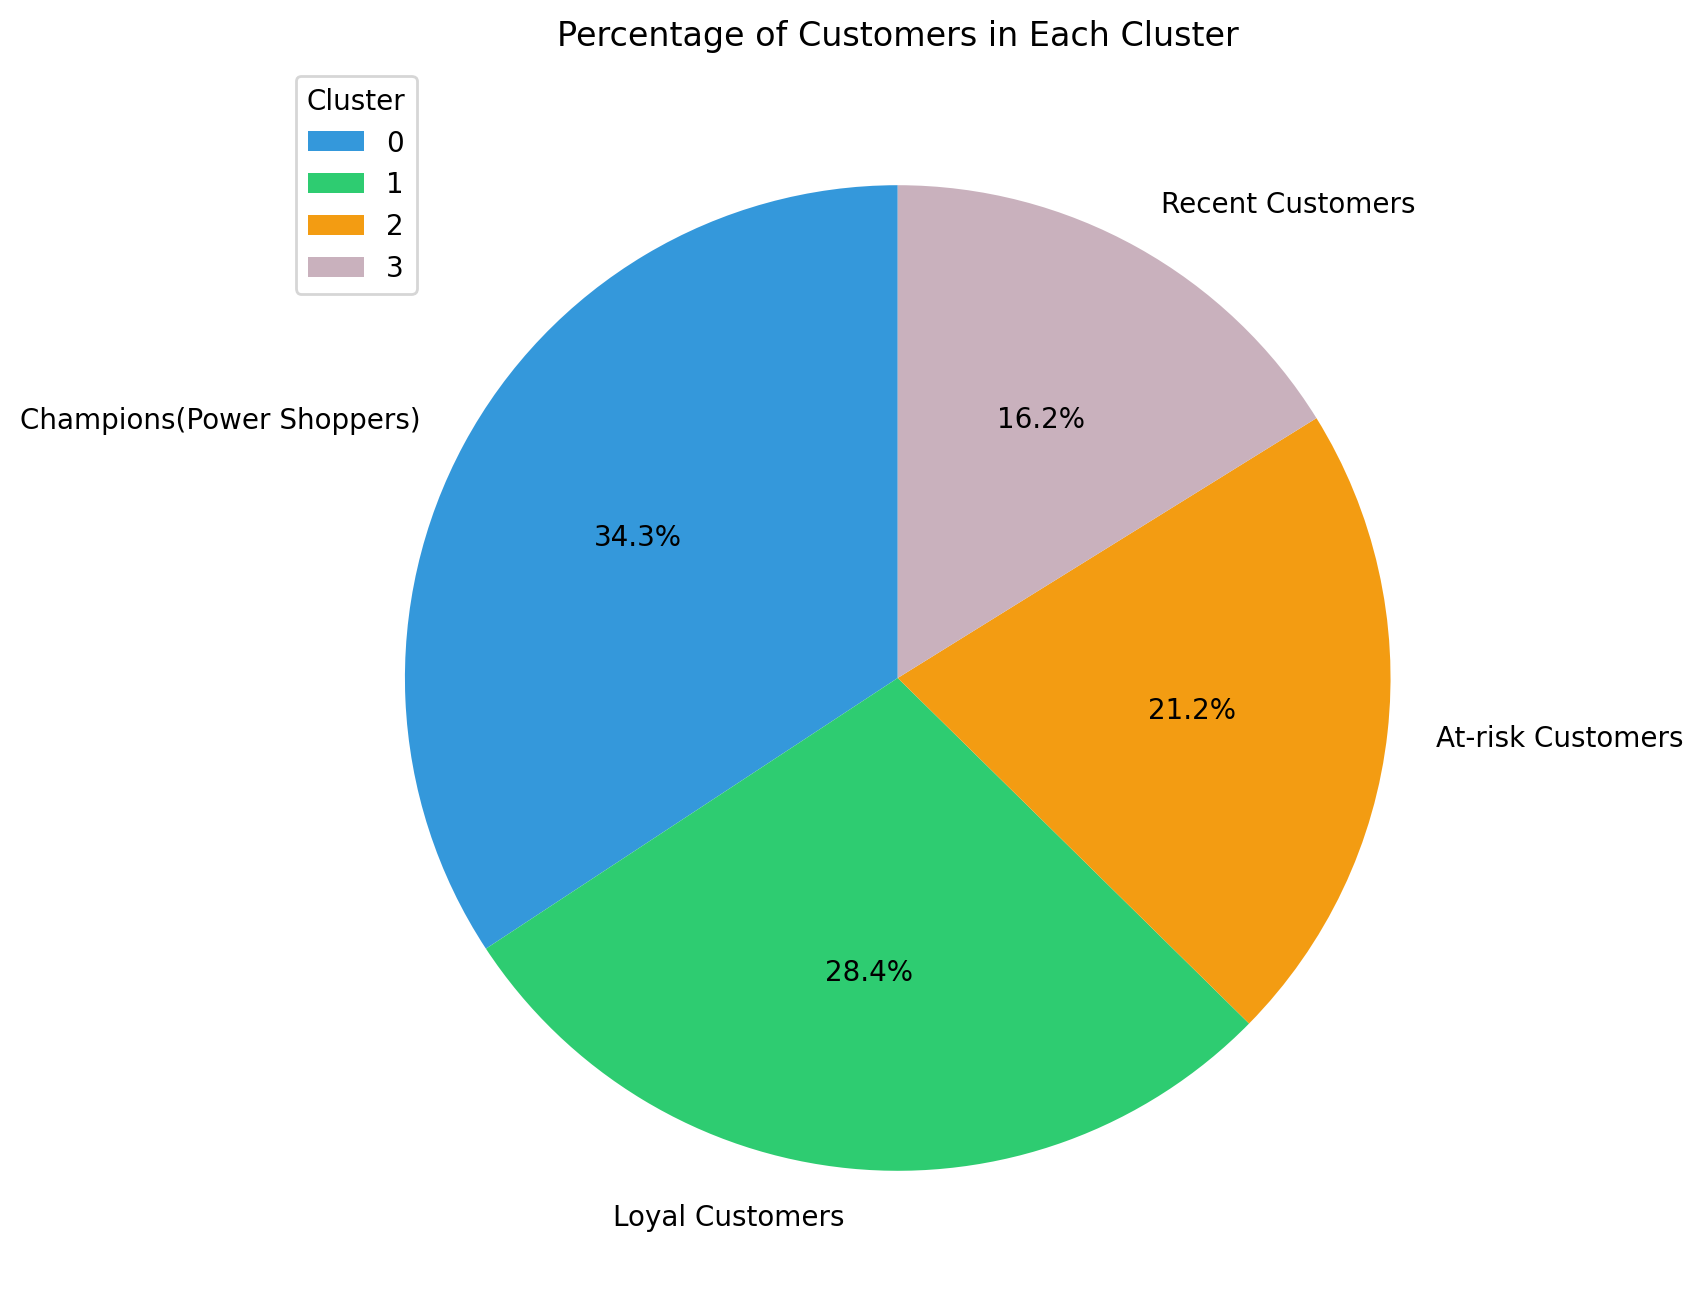

In [21]:
# For Champions/Power Shoppers: Offer personalized special discounts, early access, and other premium perks to make them feel valued and appreciated.

# For Loyal Customers: Appreciation campaigns, referral bonuses, and rewards for loyalty.

# For At-Risk Customers: Re-engagement efforts that include running discounts or promotions to encourage buying.

# For Recent Customers: Targeted campaigns educating them about the brand and discounts on subsequent purchases. 

# Let’s visualize the distribution of the different clusters using a pie chart:

cluster_counts = rfm['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()